In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'D:\Files\GoogleDrive\My writings\Onlinenotes\MachineLearning\ml23\contents\4':
  os.chdir(r'D:\Files\GoogleDrive\My writings\Onlinenotes\MachineLearning\ml23\contents\4')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


C:\Users\Xinli\AppData\Local\Temp\ipykernel_3580\961743805.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\importlib\\_bootstrap.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\importlib\\_bootstrap_external.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\codecs.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\encodings\\aliases.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\encodings\\__init__.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\encodings\\utf_8.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\encodings\\cp1252.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\abc.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\io.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\stat.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\_collections_abc.py": 1680645435.0, "C:\\Users\\Xinli\\mambaforge\\envs\\base23\\lib\\genericpath.py": 1680645435

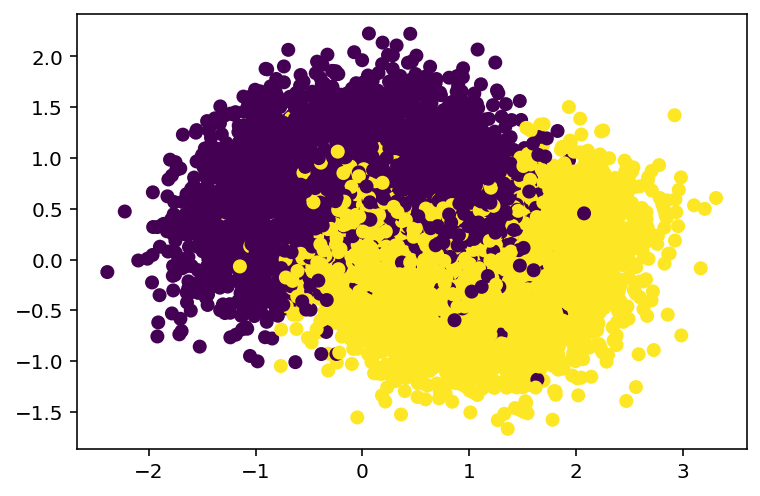

In [2]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)
plt.scatter(x=X[:, 0], y=X[:, 1], c=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [3]:
from sklearn.model_selection import ShuffleSplit
n_trees = 1000
n_instances = 100
rs = ShuffleSplit(n_splits=n_trees, test_size=1, train_size=n_instances).split(X_train)

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

y_pred_list = list()
acc_list = list()
for mini_train_index, _ in rs:
    X_subset = X_train[mini_train_index]
    y_subset = y_train[mini_train_index]
    clf_ind = DecisionTreeClassifier(min_samples_split=2, max_leaf_nodes=17)
    clf_ind.fit(X_subset, y_subset)
    y_pred = clf_ind.predict(X_test)
    y_pred_list.append(y_pred)
    acc_list.append(accuracy_score(y_pred, y_test))

np.mean(acc_list)

0.8053333333333332

In [5]:
from scipy.stats import mode
voting = np.array(y_pred_list)
y_pred_mode, _ = mode(voting, axis=0, keepdims=False)

In [6]:
accuracy_score(y_pred_mode, y_test)

0.87

In [7]:
n_trees = 500
n_instances = 1000
rs = ShuffleSplit(n_splits=n_trees, test_size=1, train_size=n_instances).split(X_train)
y_pred_list = list()
acc_list = list()
for mini_train_index, _ in rs:
    X_subset = X_train[mini_train_index]
    y_subset = y_train[mini_train_index]
    clf_ind = DecisionTreeClassifier(max_depth=1)
    clf_ind.fit(X_subset, y_subset)
    y_pred = clf_ind.predict(X_test)
    y_pred_list.append(y_pred)
    acc_list.append(accuracy_score(y_pred, y_test))
print('The mean of individual accuracy: {}'.format(np.mean(acc_list)))

voting = np.array(y_pred_list)
y_pred_mode, _ = mode(voting, axis=0, keepdims=False)
print('The accuracy of the bagging classifier: {}'.format(accuracy_score(y_pred_mode, y_test)))

The mean of individual accuracy: 0.7870533333333334
The accuracy of the bagging classifier: 0.7913333333333333


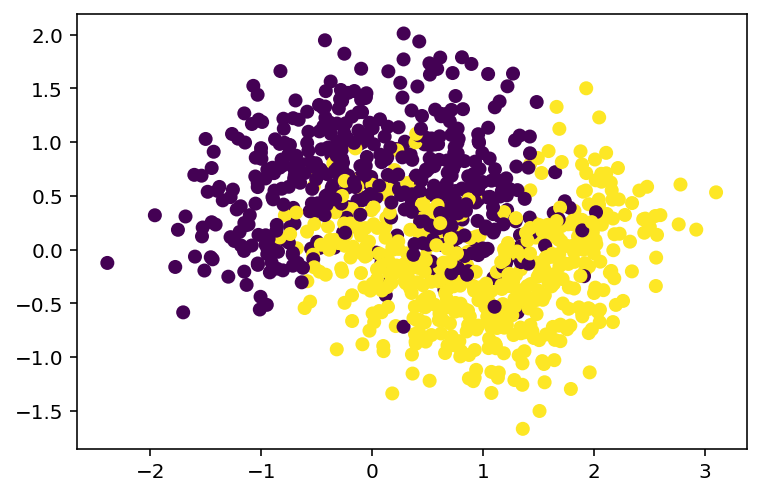

In [8]:
Npiece = 1000
plt.scatter(x=X[:Npiece, 0], y=X[:Npiece, 1], c=y[:Npiece])

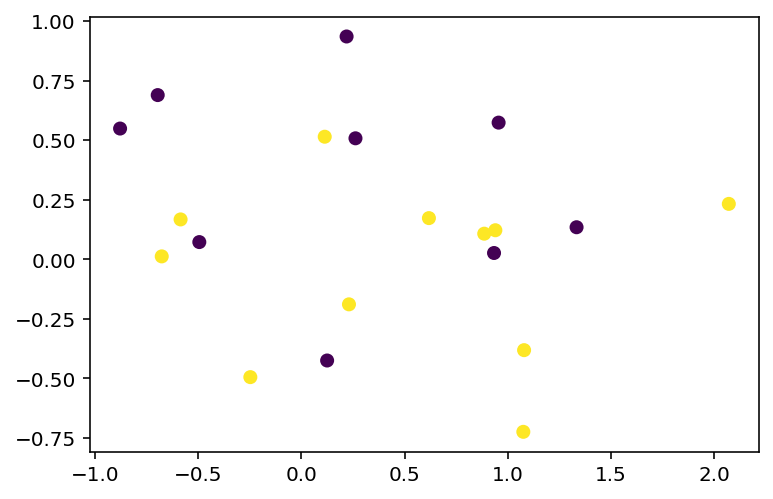

In [9]:
Npiece = 20
plt.scatter(x=X[:Npiece, 0], y=X[:Npiece, 1], c=y[:Npiece])

In [10]:
n_trees = 500
n_instances = 20
rs = ShuffleSplit(n_splits=n_trees, test_size=1, train_size=n_instances).split(X_train)
y_pred_list = list()
acc_list = list()
for mini_train_index, _ in rs:
    X_subset = X_train[mini_train_index]
    y_subset = y_train[mini_train_index]
    clf_ind = DecisionTreeClassifier(max_depth=1)
    clf_ind.fit(X_subset, y_subset)
    y_pred = clf_ind.predict(X_test)
    y_pred_list.append(y_pred)
    acc_list.append(accuracy_score(y_pred, y_test))
print('The mean of individual accuracy: {}'.format(np.mean(acc_list)))

voting = np.array(y_pred_list)
y_pred_mode, _ = mode(voting, axis=0, keepdims=False)
print('The accuracy of the bagging classifier: {}'.format(accuracy_score(y_pred_mode, y_test)))

The mean of individual accuracy: 0.7314506666666666
The accuracy of the bagging classifier: 0.8206666666666667


In [11]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(),
                            n_estimators=1000,
                            max_samples=100,
                            bootstrap=True)

In [12]:
bag_clf.fit(X_train, y_train)
y_pred_bag = bag_clf.predict(X_test)
accuracy_score(y_pred_bag, y_test)

0.868

In [13]:
bag_clf_oob = BaggingClassifier(DecisionTreeClassifier(),
                                n_estimators=1000,
                                max_samples=100,
                                bootstrap=True,
                                oob_score=True)
bag_clf_oob.fit(X_train, y_train)
bag_clf_oob.oob_score_

0.8638823529411764

In [14]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=1000, max_leaf_nodes=17)
rnd_clf.fit(X_train, y_train)
y_pred_rnd = rnd_clf.predict(X_test)
accuracy_score(y_pred_rnd, y_test)

0.8673333333333333

In [15]:
n_trees = 500
n_instances = 20
rs = ShuffleSplit(n_splits=n_trees, test_size=1, train_size=n_instances).split(X_train)
y_pred_list = list()
acc_list = list()
for mini_train_index, _ in rs:
    X_subset = X_train[mini_train_index]
    y_subset = y_train[mini_train_index]
    clf_ind = DecisionTreeClassifier(max_depth=1)
# random split
    i = np.random.randint(0, X_subset.shape[0])
    j = np.random.randint(0, X_subset.shape[1])
    split_threshold = X_subset[i, j]
    lsetindex = np.where(X_subset[:, j]<split_threshold)[0]

    if len(lsetindex) == 0:
        rsetindex = np.where(X_subset[:, j]>=split_threshold)
        rmode, _ = mode(y_subset[rsetindex])
        rmode = rmode[0]
        lmode = 1 - rmode
    else:
        lmode, _ = mode(y_subset[lsetindex])
        lmode = lmode[0]
        rmode = 1 - lmode
    y_pred = np.where(X_test[:, j] < split_threshold, lmode, rmode).reshape(-1)
# The above code is used to use the random split to classify the data points
    y_pred_list.append(y_pred)
    acc_list.append(accuracy_score(y_pred, y_test))
print('The mean of individual accuracy: {}'.format(np.mean(acc_list)))

voting = np.array(y_pred_list)
y_pred_mode, _ = mode(voting, axis=0)
y_pred_mode = y_pred_mode.reshape(-1)
print('The accuracy of the bagging classifier: {}'.format(accuracy_score(y_pred_mode, y_test)))

C:\Users\Xinli\AppData\Local\Temp\ipykernel_3580\3859426126.py:22: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  lmode, _ = mode(y_subset[lsetindex])
C:\Users\Xinli\AppData\Local\Temp\ipykernel_3580\3859426126.py:22: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  l

C:\Users\Xinli\AppData\Local\Temp\ipykernel_3580\3859426126.py:22: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  lmode, _ = mode(y_subset[lsetindex])
C:\Users\Xinli\AppData\Local\Temp\ipykernel_3580\3859426126.py:22: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  l

The mean of individual accuracy: 0.6299226666666666
The accuracy of the bagging classifier: 0.8173333333333334


C:\Users\Xinli\AppData\Local\Temp\ipykernel_3580\3859426126.py:32: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  y_pred_mode, _ = mode(voting, axis=0)


In [16]:
from sklearn.ensemble import ExtraTreesClassifier

ext_clf = ExtraTreesClassifier(n_estimators=1000, max_leaf_nodes=17)
ext_clf.fit(X_train, y_train)
y_pred_rnd = ext_clf.predict(X_test)
accuracy_score(y_pred_rnd, y_test)

0.858

In [17]:
from time import time
t0 = time()
rnd_clf = RandomForestClassifier(n_estimators=1000, max_leaf_nodes=17)
rnd_clf.fit(X_train, y_train)
t1 = time()
print('Random Frorest: {}'.format(t1 - t0))

t0 = time()
ext_clf = ExtraTreesClassifier(n_estimators=1000, max_leaf_nodes=17)
ext_clf.fit(X_train, y_train)
t1 = time()
print('Extremely Randomized Trees: {}'.format(t1 - t0))

Random Frorest: 7.164919376373291


Extremely Randomized Trees: 2.280742645263672


In [18]:
rnd_clf.fit(X_train, y_train)
rnd_clf.feature_importances_

array([0.44494443, 0.55505557])

In [19]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

clfs = [('knn', KNeighborsClassifier(n_neighbors=5)),
        ('dt', DecisionTreeClassifier(max_depth=2))]
voting_clf = VotingClassifier(estimators=clfs, voting='hard')

In [20]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipe = Pipeline(steps=[('scalar', MinMaxScaler()),
                       ('knn', KNeighborsClassifier())])
parameters = {'knn__n_neighbors': list(range(1, 51))}
gs_knn = GridSearchCV(pipe, param_grid=parameters) 
gs_knn.fit(X_train, y_train)
clf_knn = gs_knn.best_estimator_
clf_knn.score(X_test, y_test)

0.852

In [22]:
from sklearn.tree import DecisionTreeClassifier

gs_dt = GridSearchCV(DecisionTreeClassifier(), param_grid={'max_depth': list(range(1, 11)), 'max_leaf_nodes': list(range(10, 30))})
gs_dt.fit(X_train, y_train)
clf_dt = gs_dt.best_estimator_
clf_dt.score(X_test, y_test)

0.8473333333333334

In [23]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)
clf_lr.score(X_test, y_test)

0.8186666666666667

In [24]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
clfs = [('knn', KNeighborsClassifier()),
        ('dt', DecisionTreeClassifier()),
        ('lr', LogisticRegression())]
voting_clf = VotingClassifier(estimators=clfs, voting='hard')
voting_clf.fit(X_train, y_train)
voting_clf.score(X_test, y_test)

0.8386666666666667

In [25]:
#| echo: false

import pandas as pd
name = ['x0', 'x1', 'y', 'Weight']
data = [['1.0', '2.1', '+', '0.5'],
        ['1.0', '1.1', '+', '0.125'],
        ['1.3', '1.0', '-', '0.125'],
        ['1.0', '1.0', '-', '0.125'],
        ['2.0', '1.0', '+', '0.125']]
df = pd.DataFrame(data, columns=name)
df.style.hide(axis='index')

x0,x1,y,Weight
1.0,2.1,+,0.5
1.0,1.1,+,0.125
1.3,1.0,-,0.125
1.0,1.0,-,0.125
2.0,1.0,+,0.125


In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=1000,
                             learning_rate=.5)

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
scores = cross_val_score(ada_clf, X, y, cv=5)
scores.mean()

0.9533333333333334

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/horse-colic/horse-colic.data'
df = pd.read_csv(url, delim_whitespace=True, header=None)
df = df.replace("?", np.NaN)
df = df.fillna(0)
X = df.iloc[:, 1:].to_numpy().astype(float)
y = df[0].to_numpy().astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [29]:
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=50, learning_rate=0.2)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7333333333333333

In [30]:
from sklearn.datasets import make_gaussian_quantiles

X1, y1 = make_gaussian_quantiles(cov=2.0, n_samples=200, n_features=2,
                                 n_classes=2, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5, n_samples=300,
                                 n_features=2, n_classes=2, random_state=1)
X = np.concatenate((X1, X2))
y = np.concatenate((y1, -y2 + 1))